**Plot Final Test Performance**

In [1]:
import pandas as pd
import numpy as np

In [2]:
final_df = pd.read_csv("final_performance.csv", sep='\,', engine='python')

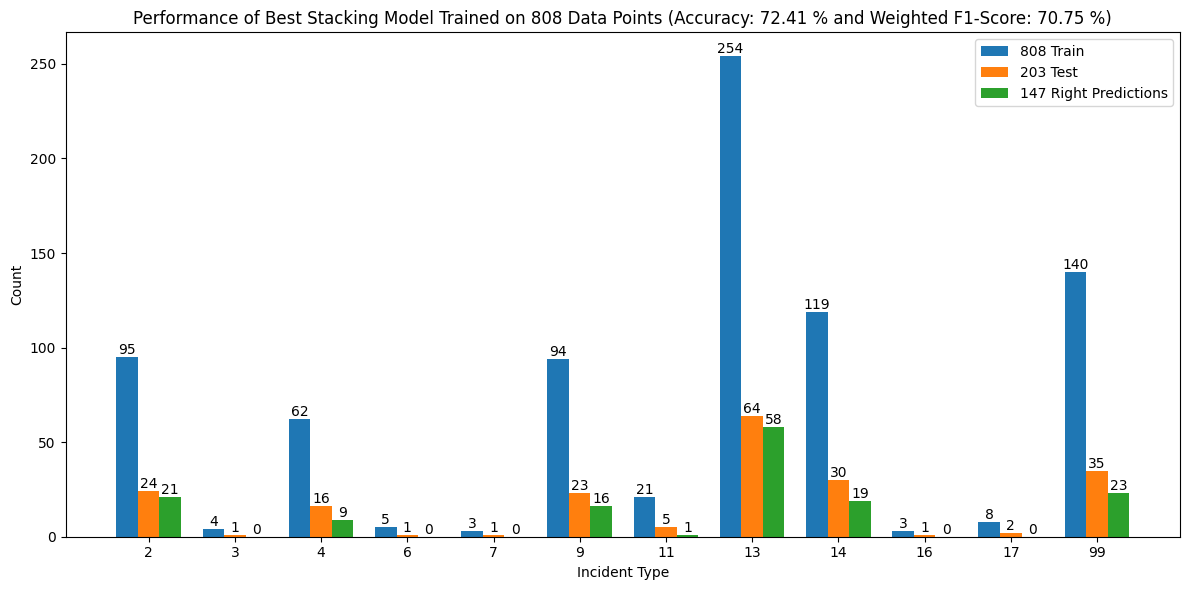

In [3]:
import matplotlib.pyplot as plt

# Reorder the 'class' column to be in ascending order
# Drop the index and sort the DataFrame by 'class' in ascending order
# Ensure the 'class' column is interpreted correctly
final_df['class'] = pd.to_numeric(final_df['class'], errors='coerce')

# Sort the DataFrame by 'class' and reset the index
final_df = final_df.sort_values(by='class').reset_index(drop=True)

# Ensure 'class' is treated as a categorical variable in ascending order
final_df['class'] = pd.Categorical(final_df['class'], categories=sorted(final_df['class'].unique()), ordered=True)

# Adjust bar alignment to include a third bar for train_count
fig = plt.figure(figsize=(12, 6))
x = range(len(final_df))  # Use a simple range for x-axis positions

# Bar width
bar_width = 0.25

# Plot bars for train_count, support, and right_pred
bars1 = plt.bar([i - bar_width for i in x], final_df['train_count'], width=bar_width, label='808 Train', align='center')
bars2 = plt.bar(x, final_df['support'], width=bar_width, label='203 Test', align='center')
bars3 = plt.bar([i + bar_width for i in x], final_df['right_pred'], width=bar_width, label='147 Right Predictions', align='center')

# Add labels above the bars
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f'{int(bar.get_height())}', ha='center', va='bottom')
for bar in bars2:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f'{int(bar.get_height())}', ha='center', va='bottom')
for bar in bars3:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f'{int(bar.get_height())}', ha='center', va='bottom')

# Add labels and legend
plt.xlabel('Incident Type')
plt.ylabel('Count')
plt.title('Performance of Best Stacking Model Trained on 808 Data Points (Accuracy: 72.41 % and Weighted F1-Score: 70.75 %)')
plt.xticks(x, final_df['class'].astype(str))  # Use class names as x-axis labels
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

#fig.savefig('finalPerformance.png')